# Exploratory Data Analysis - Ames Housing Data

## Objectives


### Goal

It is your job to predict the sales price for each house. For each Id in the test set, you must predict the value of the SalePrice variable. 

### Metric

Submissions are evaluated on Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price. (Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.)

## Initial Data Exploration

### About Ames Iowa

### About Iowa State University



### Initial Data Set Exploration (Based off of Kaggle [Tutorial](https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python))

We are using the Kaggle tutorial to help structure the initial EDA as well as learn some new libraries.

#### Load and Inspect Data

First, import all the required packages and pull the data for the EDA.

In [2]:
# Import Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from math import sqrt
%matplotlib inline
from sklearn.linear_model import LinearRegression
import itertools as itertools
import scipy.stats as stats
from scipy.stats import chi2_contingency

In [3]:
# Import data

#Import train data
train_data_url = 'https://raw.githubusercontent.com/cal-dortiz/W207_Applied-_Machine_Learning/main/Final_Project/Data/train.csv'
df_train = pd.read_csv(train_data_url)

#Import test data
test_data_url = 'https://raw.githubusercontent.com/cal-dortiz/W207_Applied-_Machine_Learning/main/Final_Project/Data/test.csv'
df_test = pd.read_csv(test_data_url)

Next, lets confirm we the data we expect and start exploring what it looks like.

In [3]:
# Check the attributes of the data. There should be 81 different columns 
# from the data set
df_train.shape

(1460, 81)

In [4]:
#Print out the first several rows to view the different category types
df_train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [5]:
# Check the attributes
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

The data was loaded successfully and now we have an idea of what attributes we can explore.

#### Explore the Dependent Variable, Sales Price

The models goal is to predict the sale price of a house given its attributes, there for we will be regressing on the SalePrice variable. This section explores the distribution of SalePrice and assess if any transformation will be required.

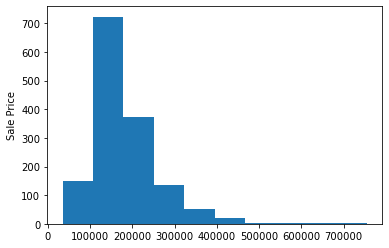

In [6]:
# Explore the sales price, the variable we will be regressing on
df_train['SalePrice'].describe()

# Plot using pyplot
plt.hist(df_train['SalePrice'])
plt.ylabel('Sale Price')
plt.show()

/Users/danielortiz/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

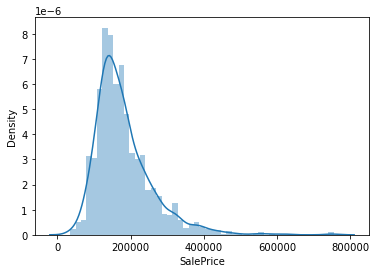

In [7]:
# Same plot with Seaborn 
sns.distplot(df_train['SalePrice'])

The raw SalePrice data has a positive skew which peaks just under $200K. 

/Users/danielortiz/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

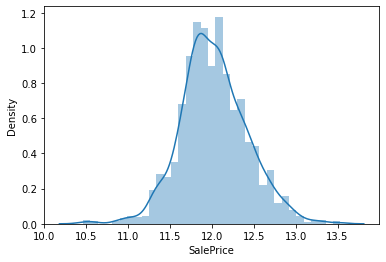

In [8]:
# Same plot with Seaborn 
sns.distplot(np.log(df_train['SalePrice']))

Applying a log transformation to the data results in a fairly normal distribution. Therefore we will need to apply a log transformation in our model.

### Missing Data

To understand what attributes are represented throughout the dataset, we need to understand what data, if any is missing. Below are the attributes with missing data:

In [9]:
# Data That is Missing (From Kaggle Tutorial)[https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python]

df_train.isnull().sum().sort_values(ascending = False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
Utilities          0
dtype: int64

It is important to note, that just becuase our analysis indicates the data is missing, doesn't mean that it isn't significant. According to the data's [documentation](https://raw.githubusercontent.com/cal-dortiz/W207_Applied-_Machine_Learning/main/Final_Project/Data/data_description.txt), many of these "NaN" values indicate that the property does not have the attribute being measured. If we choose to use one of the above attributes in the model, we will need to assess the right way to handle these holes in the data.

From these plot we can easily get a sence of attributes that will have a correlation and attributes that will not have a correlation with SalePrice. In addition, graphs that show little variance indiciate those attributes will have little power in our model and those that look like histograms need to be assessed as either ordinal or catigorical data.

### Nomnial Correlation Study

A correlation matrix allows easy visualization of nominal data, including sale price, is correlatated to eachother. This will provide insights into attributes that will contribute to the model and identify colinearity concerns.

<AxesSubplot:>

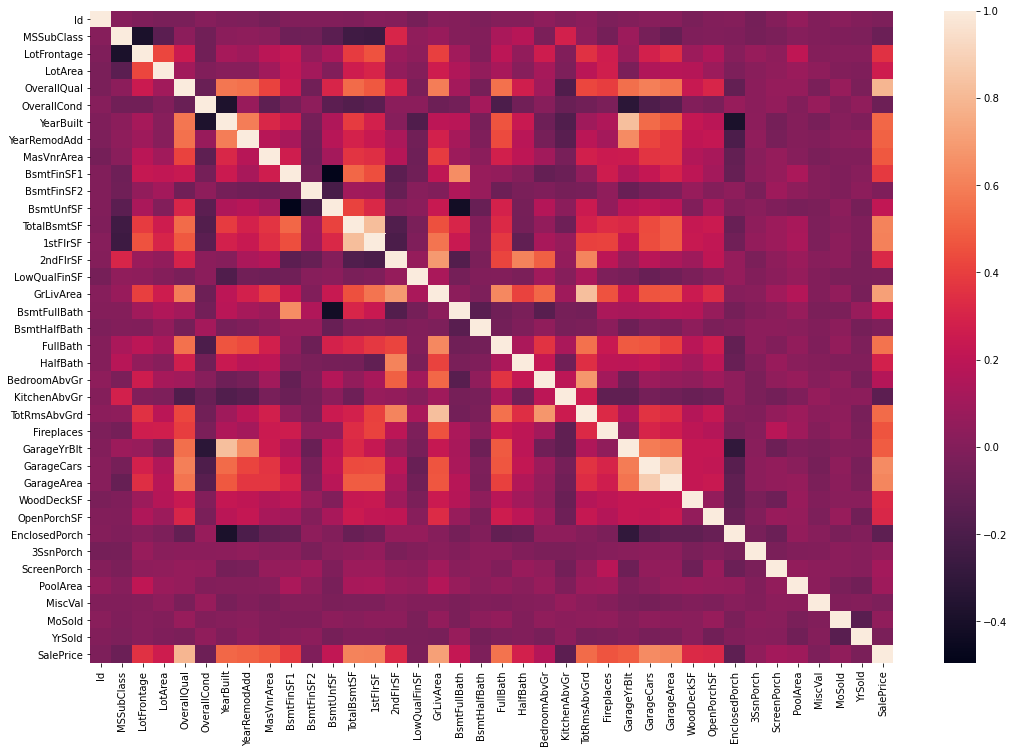

In [14]:
# Generate a correlation matrix over all variables
corrmat = df_train.corr(min_periods=1)
f, ax = plt.subplots(figsize=(18, 12))
sns.heatmap(corrmat, xticklabels=True, yticklabels=True)

### Catagorical Data Study

#### Box Plot

In [15]:
# Define Data Set for All Catagorical (incliuding ordinal) data
catagorical_train = df_train[['MSSubClass', 'MSZoning', 'Street','Alley','LotShape', 'LandContour',
                             'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
                             'Condition2','HouseStyle', 'OverallQual','OverallCond', 'YearRemodAdd',
                             'RoofStyle','RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
                             'ExterQual','ExterCond', 'Foundation','BsmtQual','BsmtCond','BsmtExposure',
                             'BsmtFinType1','BsmtFinType2','Heating', 'HeatingQC','CentralAir','Electrical',
                             'KitchenQual','Functional','FireplaceQu', 'GarageType','GarageFinish','GarageQual',
                             'GarageCond', 'PavedDrive','PoolQC','Fence', 'MiscFeature', 'SaleType','YearBuilt',
                             'BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr',
                             'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
                             'MoSold', 'YrSold','SaleCondition', 'SalePrice']].copy()

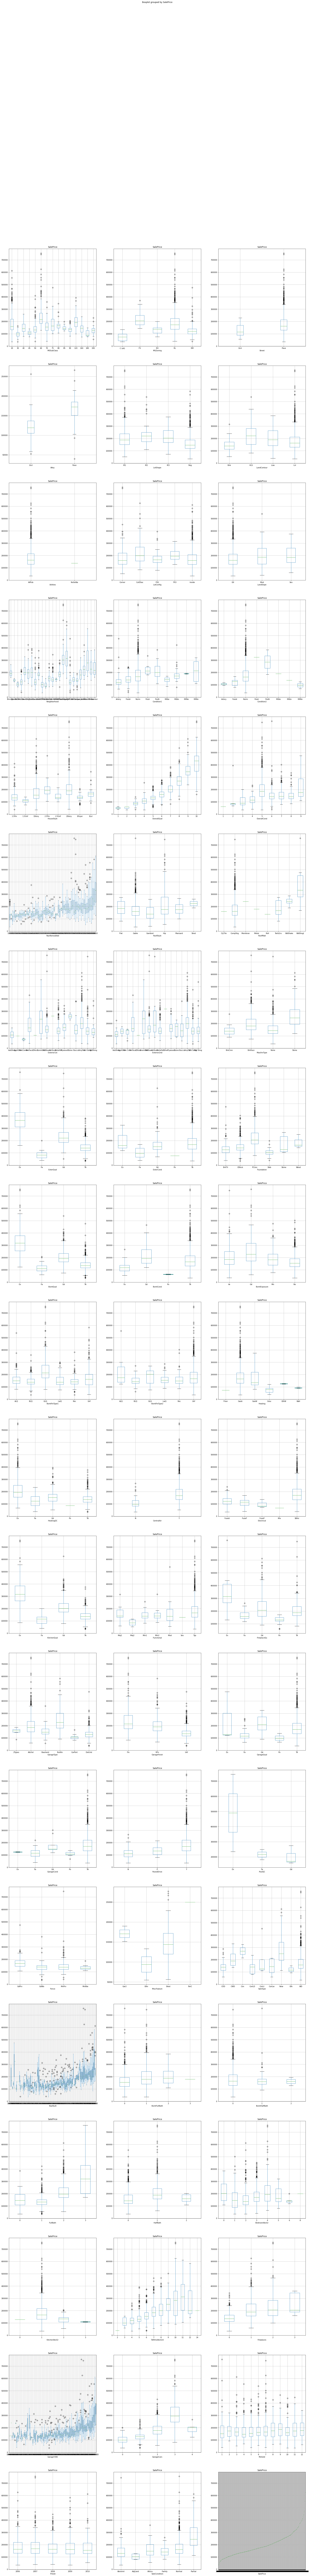

In [16]:
#Boxplot for all catagorical data
fig, ax = plt.subplots(20, 3, figsize = (30,250))

col = 0
for i in range(20):
  for j in range(3):
    catagorical_train.boxplot(column=["SalePrice"], by=catagorical_train.columns[col], ax=ax[i][j])
    col+=1

#### Cramers V - Catagorical Data Assoication

ABOUT CRAMERS V

In [17]:
# Implement Cramer's V for Associsation
# https://www.kaggle.com/chrisbss1/cramer-s-v-correlation-matrix
from sklearn import preprocessing

# Create a new dataframe 
cv_df = catagorical_train.copy()
del cv_df['SalePrice']

# Delete alley due to NA in data
cv_df['Alley'].fillna("NoAlley", inplace = True)
cv_df['MasVnrType'].fillna("NoMason", inplace = True)
cv_df['BsmtQual'].fillna("NoBsmt", inplace = True)
cv_df['BsmtCond'].fillna("NoBsmt", inplace = True)
cv_df['BsmtExposure'].fillna("NoBsmt", inplace = True)
cv_df['BsmtFinType1'].fillna("NoBsmt", inplace = True)
cv_df['BsmtFinType2'].fillna("NoBsmt", inplace = True)
cv_df['Electrical'].fillna("NoInfo", inplace = True)
cv_df['FireplaceQu'].fillna("NoFireplace", inplace = True)
cv_df['GarageType'].fillna("NoGarage", inplace = True)
cv_df['GarageFinish'].fillna("NoGarage", inplace = True)
cv_df['GarageQual'].fillna("NoGarage", inplace = True)
cv_df['GarageCond'].fillna("NoGarage", inplace = True)
cv_df['PoolQC'].fillna("NoPool", inplace = True)
cv_df['Fence'].fillna("NoFence", inplace = True)
cv_df['MiscFeature'].fillna("NoMisc", inplace = True)

# Label Encoding
label = preprocessing.LabelEncoder()
data_encoded = pd.DataFrame()

for index in cv_df.columns:
  data_encoded[index] = label.fit_transform(cv_df[index])

In [19]:
def cramers_V(var1,var2) :
  crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
  stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
  obs = np.sum(crosstab) # Number of observations
  mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
  return (stat/(obs*mini))

In [20]:
rows= []

for var1 in data_encoded:
  col = []
  for var2 in data_encoded :
    cramers =cramers_V(data_encoded[var1], data_encoded[var2]) # Cramer's V test
    col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
  rows.append(col)
  
cramers_results = np.array(rows)
df = pd.DataFrame(cramers_results, columns = data_encoded.columns, index =data_encoded.columns)


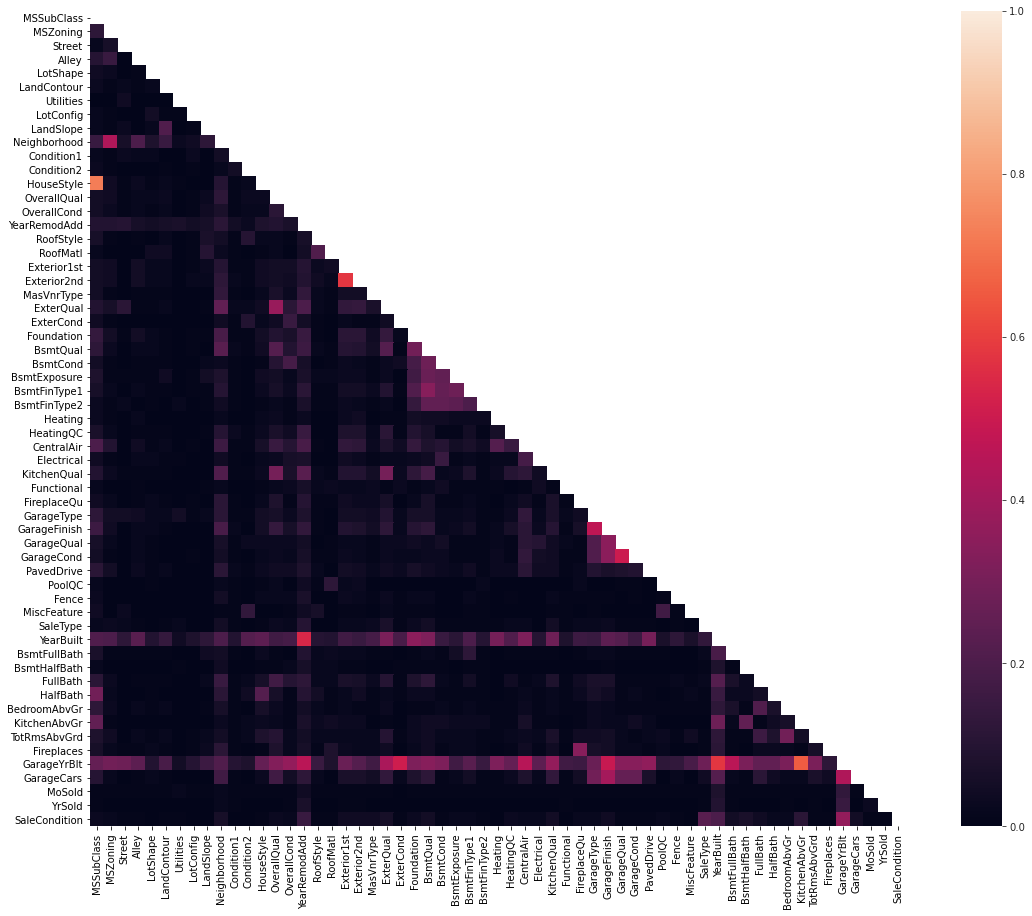

In [21]:
mask = np.zeros_like(df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.subplots(figsize=(20,15))

with sns.axes_style("white"):
  ax = sns.heatmap(df, mask=mask,vmin=0., vmax=1, square=True)

plt.show()

#### Colinearity Example
The following example shows how variables can be highliy associated/correlated to each other. It is important to minimize colinearity or we may be more confident in our model then is appropriate.

/Users/danielortiz/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/danielortiz/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


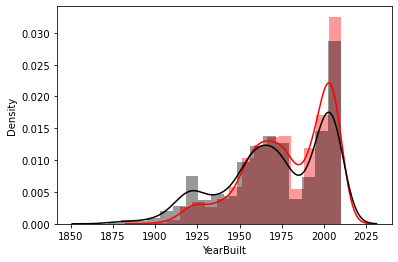

In [22]:
sns.distplot(df_train['GarageYrBlt'], color = 'r');
sns.distplot(df_train['YearBuilt'], color = 'k');